# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [74]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

print(api_key)


2722f69765e6513da21bb94883f4cda0


## Generate Cities List

In [75]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(cities)

['la ronge', 'qaanaaq', 'honiara', 'port elizabeth', 'narsaq', 'buchanan', 'asadabad', 'tiksi', 'puerto ayora', 'illoqqortoormiut', 'kapaa', 'thompson', 'starosubkhangulovo', 'mindelo', 'mataura', 'baracoa', 'taltal', 'rognedino', 'bluff', 'severo-kurilsk', 'cabo san lucas', 'hovd', 'beitbridge', 'albany', 'hobart', 'baykit', 'farim', 'souillac', 'haines junction', 'nikolskoye', 'fevralsk', 'vaini', 'xingcheng', 'kruisfontein', 'hilo', 'bilisht', 'punta arenas', 'hofn', 'rikitea', 'manzhouli', 'beira', 'belushya guba', 'songjianghe', 'manokwari', 'cape town', 'koslan', 'vardo', 'fort wellington', 'yanan', 'avera', 'ushuaia', 'pevek', 'bredasdorp', 'yulara', 'andenes', 'mahebourg', 'korla', 'hermanus', 'kaitangata', 'kurchum', 'hithadhoo', 'lata', 'barentsburg', 'mandalgovi', 'ambatofinandrahana', 'nizhneyansk', 'busselton', 'talnakh', 'whitehorse', 'aksu', 'menongue', 'upernavik', 'nemuro', 'tasiilaq', 'carnarvon', 'husavik', 'butaritari', 'marawi', 'ancud', 'isangel', 'seydi', 'kapit'

In [76]:
lat = []
lng = []
temp = []
name = []
country = []
date = []
clouds = []
humidity = []
wind_spd = []

# Save config information.              
url = "http://api.openweathermap.org/data/2.5/weather?"

for city in cities:
    units = "imperial"
    query_url = url+"appid="+api_key+"&q="+city+"&units="+units
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
        
    try:
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        temp.append(weather_json['main']['temp_max'])
        name.append(weather_json['name'])
        country.append(weather_json['sys']["country"])
        date.append(weather_json['dt'])
        clouds.append(weather_json['clouds']["all"])
        humidity.append(weather_json['main']["humidity"])
        wind_spd.append(weather_json['wind']["speed"])
        
        print(f"City = {weather_json['name']}")
        
    except KeyError:
         print(f"City = 'Ooops, that city doesn't exist'")
    



City = La Ronge
City = Qaanaaq
City = Honiara
City = Port Elizabeth
City = Narsaq
City = Buchanan
City = Asadabad
City = Tiksi
City = Puerto Ayora
City = 'Ooops, that city doesn't exist'
City = Kapaa
City = Thompson
City = Starosubkhangulovo
City = Mindelo
City = Mataura
City = Baracoa
City = Taltal
City = Rognedino
City = Bluff
City = Severo-Kurilsk
City = Cabo San Lucas
City = Hovd
City = Beitbridge
City = Albany
City = Hobart
City = Baykit
City = Farim
City = Souillac
City = Haines Junction
City = Nikolskoye
City = 'Ooops, that city doesn't exist'
City = Vaini
City = Xingcheng
City = Kruisfontein
City = Hilo
City = Bilisht
City = Punta Arenas
City = Hofn
City = Rikitea
City = Manzhouli
City = Beira
City = 'Ooops, that city doesn't exist'
City = Songjianghe
City = Manokwari
City = Cape Town
City = Koslan
City = Vardo
City = Fort Wellington
City = 'Ooops, that city doesn't exist'
City = Avera
City = Ushuaia
City = Pevek
City = Bredasdorp
City = Yulara
City = 'Ooops, that city doesn't 

City = Khingansk
City = Sobolevo
City = Deputatskiy
City = Shakawe
City = Palmer
City = Tayzhina
City = Klaksvik
City = Requena
City = Zheleznodorozhnyy
City = Wajima
City = Butembo
City = Sungaipenuh
City = Jieshi
City = Sitka
City = Roald
City = Tsimlyansk
City = Coahuayana
City = Ngorongoro
City = Zhigansk
City = Ambilobe
City = 'Ooops, that city doesn't exist'
City = Venice
City = Konstantinovka
City = Sohag
City = Prince Rupert
City = Norman Wells
City = Pinawa
City = Hasaki
City = Bereda
City = Saint-Georges
City = Sztum
City = Shahreza
City = Wadi Musa
City = Belfast
City = Broome
City = Shieli
City = Oistins
City = Sovetskaya Gavan
City = Rovaniemi
City = Inirida
City = Bosaso
City = Fort Nelson
City = Shipley
City = Iskateley
City = Pokhara
City = Scarborough
City = 'Ooops, that city doesn't exist'
City = Coolum Beach
City = Bereznik
City = Moa
City = Sao Gabriel da Cachoeira
City = Yaan
City = Nan
City = Dogondoutchi
City = 'Ooops, that city doesn't exist'
City = 'Ooops, that

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [77]:
weather_dict = {
    "City": name,
    "Cloudiness": clouds,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": temp,
    "Wind Speed": wind_spd,
}
weather_data = pd.DataFrame(weather_dict)
weather_data


weather_data['Date'] = pd.to_datetime(weather_data['Date'], unit='s')
weather_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,La Ronge,40,CA,2019-01-13 05:00:00,85,55.10,-105.30,17.60,5.82
1,Qaanaaq,0,GL,2019-01-13 05:09:19,100,77.48,-69.36,-24.64,9.89
2,Honiara,88,SB,2019-01-13 05:21:23,91,-9.43,159.96,79.76,3.13
3,Port Elizabeth,90,US,2019-01-13 05:03:00,92,39.31,-74.98,26.96,3.51
4,Narsaq,88,GL,2019-01-13 04:50:00,86,60.91,-46.05,32.00,10.29
5,Buchanan,40,LR,2019-01-13 04:00:00,100,5.88,-10.05,75.20,3.40
6,Asadabad,75,IR,2019-01-13 05:00:00,30,34.78,48.12,44.60,6.93
7,Tiksi,20,RU,2019-01-13 05:20:57,55,71.64,128.87,-31.84,3.36
8,Puerto Ayora,36,EC,2019-01-13 05:21:02,100,-0.74,-90.35,75.53,7.31
9,Kapaa,1,US,2019-01-13 05:07:00,78,22.08,-159.32,77.00,5.53


In [78]:
weather_data.count()

# print(len(name))
# print(len(clouds))
# print(len(country))
# print(len(date))
# print(len(humidity))
# print(len(lat))
# print(len(lng))
# print(len(temp))
# print(len(wind_spd))

City          556
Cloudiness    556
Country       556
Date          556
Humidity      556
Lat           556
Lng           556
Max Temp      556
Wind Speed    556
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [82]:
weather_data.to_csv("weather_api_hw2.csv", encoding="utf-8", index=False)

weather_data = pd.DataFrame(weather_data)
weather_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,La Ronge,40,CA,1547355600,85,55.10,-105.30,17.60,5.82
1,Qaanaaq,0,GL,1547356159,100,77.48,-69.36,-24.64,9.89
2,Honiara,88,SB,1547356883,91,-9.43,159.96,79.76,3.13
3,Port Elizabeth,90,US,1547355780,92,39.31,-74.98,26.96,3.51
4,Narsaq,88,GL,1547355000,86,60.91,-46.05,32.00,10.29
5,Buchanan,40,LR,1547352000,100,5.88,-10.05,75.20,3.40
6,Asadabad,75,IR,1547355600,30,34.78,48.12,44.60,6.93
7,Tiksi,20,RU,1547356857,55,71.64,128.87,-31.84,3.36
8,Puerto Ayora,36,EC,1547356862,100,-0.74,-90.35,75.53,7.31
9,Kapaa,1,US,1547356020,78,22.08,-159.32,77.00,5.53


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


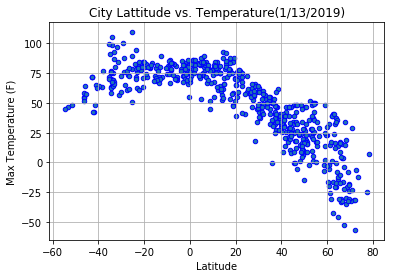

,Lat,Max Temp
Lat,1.000000,-0.782506
Max Temp,-0.782506,1.000000


<Figure size 432x288 with 0 Axes>

In [83]:
# Create Dictioinary of Latitude & Max Temp
lat_temp_dict = {
    "Lat": lat,
    "Max Temp": temp,
}

#add dictionary to dat frame
lat_temp = pd.DataFrame(lat_temp_dict)
lat_temp.head()

#Create scatter plot of data

lat_temps = lat_temp.plot(kind="scatter", x='Lat', y='Max Temp', marker="o", facecolors="red", edgecolors="blue", alpha=1)

#Label axis and title

lat_temps.set_xlabel("Latitude")
lat_temps.set_ylabel("Max Temperature (F)")
plt.title("City Lattitude vs. Temperature(1/13/2019)", size=12)
plt.grid()

plt.savefig("Images/lat_temp.png")
plt.show()
plt.tight_layout()

lat_temp.corr()

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

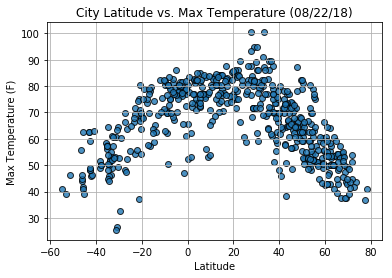

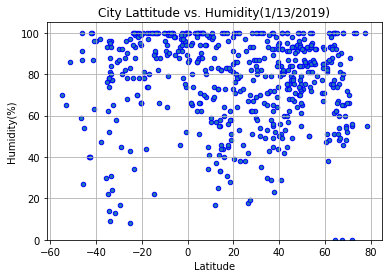

,Lat,Humidity
Lat,1.000000,-0.030641
Humidity,-0.030641,1.000000


<Figure size 432x288 with 0 Axes>

In [84]:
#Create latitude vs humidity dictionary
lat_hum_dict = {
    "Lat": lat,
    "Humidity": humidity,
}

lat_hum = pd.DataFrame(lat_hum_dict)
lat_hum.head()


#create graph
lat_humi = lat_hum.plot(kind="scatter", x='Lat', y='Humidity', marker="o", facecolors="red", edgecolors="blue", alpha=1)

#set y axis limit

plt.ylim(0, 105)

#label axis and title
lat_humi.set_xlabel("Latitude")
lat_humi.set_ylabel("Humidity(%)")
plt.title("City Lattitude vs. Humidity(1/13/2019)", size=12)
plt.grid()

plt.savefig("Images/lat_humidity.png")
plt.show()
plt.tight_layout()

lat_hum.corr()

#### Latitude vs. Humidity Plot

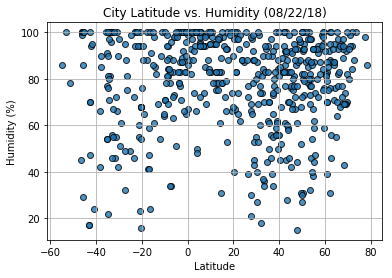

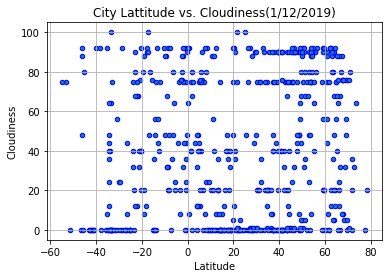

,Lat,Cloudiness
Lat,1.000000,0.131933
Cloudiness,0.131933,1.000000


<Figure size 432x288 with 0 Axes>

In [85]:
#create latitude vs Cloudiness dictionary
lat_cloud_dict = {
    "Lat": lat,
    "Cloudiness": clouds,
}

#create data frame for dictionary
lat_cloud = pd.DataFrame(lat_cloud_dict)
lat_cloud.head()

#create plot for data frame of Latitude vs Cloudiness
lat_cloudy = lat_cloud.plot(kind="scatter", x='Lat', y='Cloudiness', marker="o", facecolors="red", edgecolors="blue", alpha=1)

# plt.ylim(0, 105)

lat_cloudy.set_xlabel("Latitude")
lat_cloudy.set_ylabel("Cloudiness")
plt.title("City Lattitude vs. Cloudiness(1/12/2019)", size=12)
plt.grid()

plt.savefig("Images/lat_cloudiness.png")
plt.show()
plt.tight_layout()

lat_cloud.corr()

#### Latitude vs. Cloudiness Plot

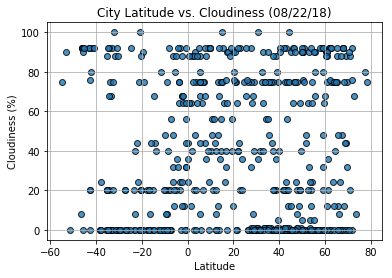

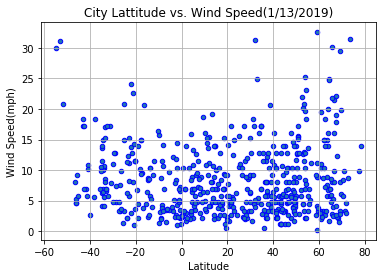

,Lat,Wind Speed
Lat,1.000000,0.007195
Wind Speed,0.007195,1.000000


<Figure size 432x288 with 0 Axes>

In [86]:
#Create dictionary of Latitude and windspeed

lat_ws_dict = {
    "Lat": lat,
    "Wind Speed": wind_spd,
}

#create data frame
lat_ws = pd.DataFrame(lat_ws_dict)
lat_ws.head()

#plot graph
lat_wsp = lat_ws.plot(kind="scatter", x='Lat', y='Wind Speed', marker="o", facecolors="red", edgecolors="blue", alpha=1)

#label axis
lat_wsp.set_xlabel("Latitude")
lat_wsp.set_ylabel("Wind Speed(mph)")
plt.title("City Lattitude vs. Wind Speed(1/13/2019)", size=12)
plt.grid()

plt.show()
plt.tight_layout()

#check correlation between variables
lat_ws.corr()

#### Latitude vs. Wind Speed Plot

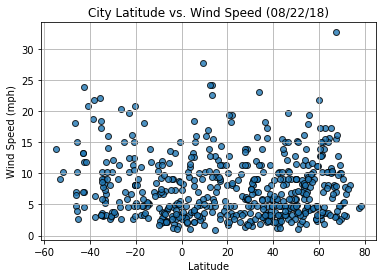